# Aufgabe 1
$$
u_t = u_{xx}
$$

Approximieren die Ableitungen:

$$
u_t(x,t) \approx \frac{u(x,t+\Delta_t) - u(x,t)}{\Delta_t}
$$

$$
u_{xx}(x,t) \approx \frac{u(x+\Delta_x,t) + 2u(x,t) - u(x-\Delta_x,t)}{(\Delta_x)^2}
$$

Wir definieren $t_j := j\cdot \Delta_t$ und $x_i := i \cdot \Delta_x$.

Alles in die Aufgabe eingesetzt:

$$
\frac{u_{i,j+1} - u_{i,j}}{\Delta_t} = \frac{u_{i+1,j} + 2u_{i,j} - u_{i-1,j}}{(\Delta_x)^2}
$$

Es ergibt sich ein Zusammenhang zwischen $u_{i,j+1}$, $u_{i-1,j}$, $u_{i,j}$ und $u_{i+1,j}$.
Wir definieren $r := \frac{\Delta_t}{(\Delta_x)^2}$ und stellen nach $u_{i,j+1}$ um:

$$
u_{i,j+1} = r \cdot u_{i+1,j} + (1 - 2r) \cdot u_{i,j} + r \cdot u_{i-1,j}
$$

In [1]:
from math import floor
import numpy as np
import matplotlib.pyplot as plt

def solve_heat_explicit(u_0, g, xmin, xmax, tmax, delta_x, delta_t):
    def i_to_x(i):
        return xmin+(i*delta_x)
    
    def j_to_t(j):
        return j*delta_t

    N = floor((xmax-xmin) / delta_x)
    T = floor(tmax / delta_t)
    r = delta_t / (delta_x*delta_x)
    print(f'r is {r}')
    u = np.zeros((N+2,T)) # Need N inner values and 2 for the edges

    for i in range(N+1):
        u[i,0] = u_0(i_to_x(i))
    for j in range(T-1):
        for i in (range(1,N+1)):
            u[i,j+1] = r*u[i+1,j] + (1-2*r)*u[i,j] + r*u[i-1,j]
        u[0,j+1] = g(xmin, j_to_t(j+1))
        u[N+1,j+1] = g(xmax, j_to_t(j+1))

    plt.imshow(u, extent=[0,tmax,xmin,xmax], cmap='hot', aspect='auto')
    plt.xlabel('t')
    plt.ylabel('x') 
    plt.colorbar()

r is 0.1


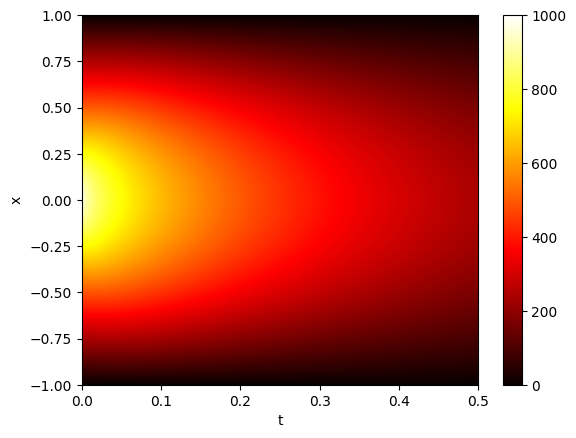

In [2]:
delta_t = 0.00001
delta_x = 0.01
xmin = -1
xmax = 1
tmax = 0.5

def u_0(x): return 1000 - abs(1000*x)
def g(x,t): return 0
solve_heat_explicit(u_0, g, xmin, xmax, tmax, delta_x, delta_t)

r is 0.5999999999999999


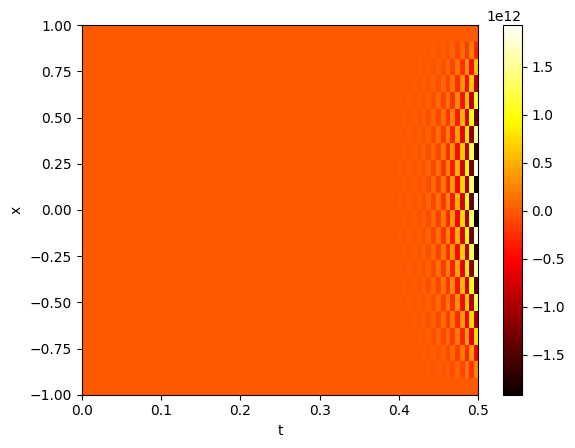

In [3]:
delta_t = 0.006
delta_x = 0.1
xmin = -1
xmax = 1
tmax = 0.5

def u_0(x): return 1000 - abs(1000*x)
def g(x,t): return 0
solve_heat_explicit(u_0, g, xmin, xmax, tmax, delta_x, delta_t)

# Aufgabe 2

In [4]:
from scipy.linalg import solve_banded
def solve_heat_implicit(u_0, g, xmin, xmax, tmax, delta_x, delta_t):
    def i_to_x(i):
        return xmin+(i*delta_x)
    
    def j_to_t(j):
        return j*delta_t

    N = floor((xmax-xmin) / delta_x)
    T = floor(tmax / delta_t)
    r = delta_t / (delta_x*delta_x)
    print(f'r is {r}')
    u = np.empty((N+2,T)) # Need N inner values and 2 for the edges
    a_lu = np.zeros(N)
    a_lu[1:] = np.repeat(-r, N-1)
    a_d = np.repeat(1+2*r, N)
    A = np.vstack([a_lu, a_d, a_lu]) # Construct tridiagonal matrix
    
    for i in range(N+1):
        u[i,0] = u_0(i_to_x(i))
    for j in range(T-1):
        u[1:N+1,j+1] = solve_banded((1,1), A, u[1:N+1,j])
        u[0,j+1] = g(xmin, j_to_t(j+1))
        u[N+1,j+1] = g(xmax, j_to_t(j+1))

    plt.imshow(u, extent=[0,tmax,xmin,xmax], cmap='hot', aspect='auto')
    plt.xlabel('t')
    plt.ylabel('x') 
    plt.colorbar()

r is 0.1


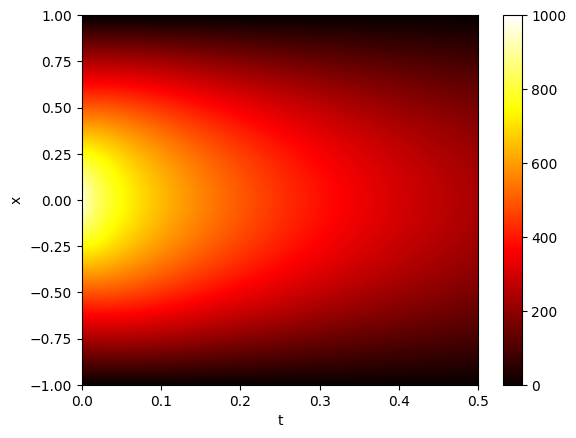

In [5]:
delta_t = 0.00001
delta_x = 0.01
xmin = -1
xmax = 1
tmax = 0.5

def u_0(x): return 1000 - abs(1000*x)
def g(x,t): return 0
solve_heat_implicit(u_0, g, xmin, xmax, tmax, delta_x, delta_t)

r is 10.0


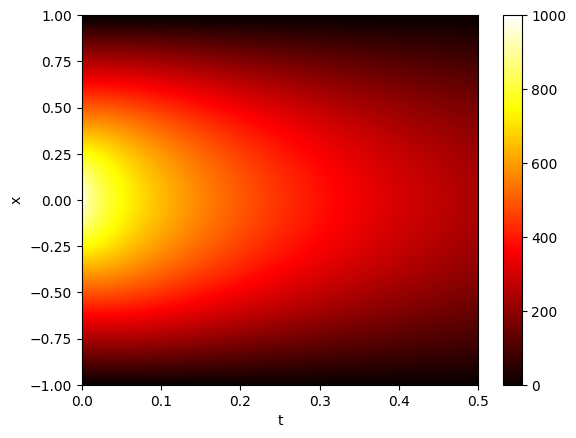

In [6]:
delta_t = 0.001
delta_x = 0.01
xmin = -1
xmax = 1
tmax = 0.5

def u_0(x): return 1000 - abs(1000*x)
def g(x,t): return 0
solve_heat_implicit(u_0, g, xmin, xmax, tmax, delta_x, delta_t)